<a href="https://colab.research.google.com/github/sarab421/ML-spam-identifier/blob/main/Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv', encoding = "cp1252")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning:
1 Droping Last three columns why? because most of the values are null

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
5015,ham,Hey gals...U all wanna meet 4 dinner at nÌÂte?
4973,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...
4134,ham,No need to say anything to me. I know i am an ...
1438,ham,"Arms fine, how's Cardiff and uni?"
1246,ham,"I do know what u mean, is the king of not hav..."


# Not necessary but still it's a new thing so i will rename the columns

In [ ]:
df.rename(columns={'v1':'Target','v2':'Text Data'},inplace=True)
df.sample(10)

,Target,Text Data
440,ham,Yes..he is really great..bhaji told kallis bes...
2493,ham,they released another Italian one today and it...
4073,ham,A lot of this sickness thing going round. Take...
3380,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
2082,ham,I'm done oredi...
3818,ham,"sorry brah, just finished the last of my exams..."
393,ham,Yes i think so. I am in office but my lap is i...
16,ham,Oh k...i'm watching here:)
4022,ham,Well. Balls. Time to make calls
4256,spam,important information 4 orange user . today is...


# Now We need to convert that ham and span values into 0,1

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()
#df.head()

,Target,Text Data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Checking for missing Values like we did with .info()

In [ ]:
df.isnull().sum()

Target       0
Text Data    0
dtype: int64

# Checking for Duplicates

In [ ]:
df.duplicated().sum()

403

# Remove Duplicate

In [ ]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

#  Done with Cleaning Part                        .........................................................................


# **2.EDA**

Counting No. of Spams and not Spams(hams)

In [ ]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

Showing the above data in pie chat

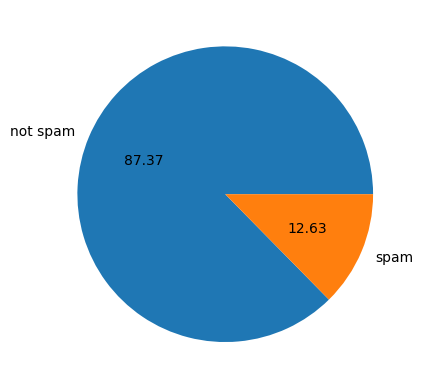

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['not spam', 'spam'], autopct='%0.2f')
plt.show()

# Now we Know data is imbalanced as you can see in the above graph
so, now we will perform deeper analysis to see how many words, characters and sentenses are there in our email

Now as we are checking the number of words characters and sentenses we will make three columns, one for each of them.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['no. of characters']=df['Text Data'].apply(len)
df.head(10)

,Target,Text Data,no. of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


Now make a second column for Words

In [ ]:
df['no. of words']=df['Text Data'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text Data,no. of characters,no. of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


Checking the Number of Sentences

In [ ]:
df['no. of sentences']=df['Text Data'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text Data,no. of characters,no. of words,no. of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# **Now Let's start differenciating btw Spam and Not Spam msgs**

For Spam msgs

In [ ]:
df[df['Target']==1][['no. of characters','no. of words','no. of sentences']].describe()

,no. of characters,no. of words,no. of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


For Not Spam

In [ ]:
df[df['Target']==0][['no. of characters','no. of words','no. of sentences']].describe()

,no. of characters,no. of words,no. of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Show all this in histogram for NOT SPAM

<Axes: xlabel='no. of words', ylabel='Count'>

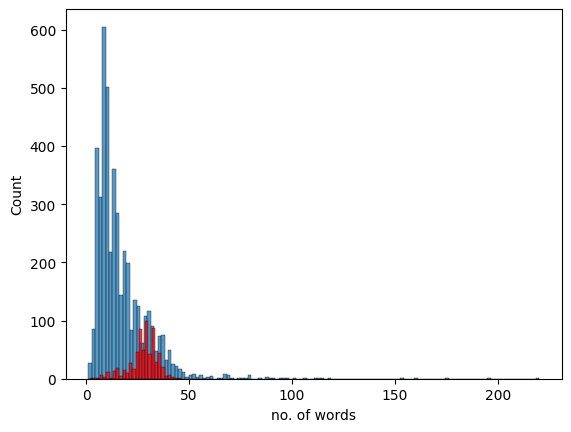

In [ ]:
import seaborn as sns
sns.histplot(df[df['Target']==0]['no. of words'])
sns.histplot(df[df['Target']==1]['no. of words'], color='red')

<Axes: xlabel='no. of characters', ylabel='Count'>

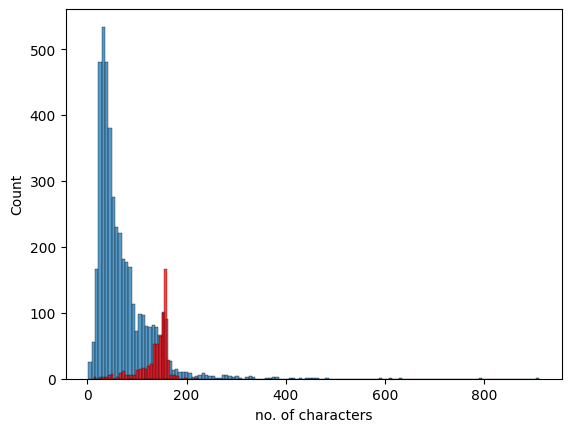

In [ ]:
sns.histplot(df[df['Target']==0]['no. of characters'])
sns.histplot(df[df['Target']==1]['no. of characters'], color='red')

<Axes: xlabel='no. of sentences', ylabel='Count'>

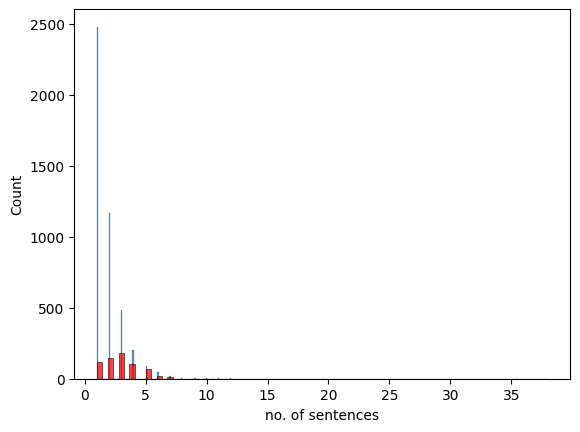

In [ ]:
sns.histplot(df[df['Target']==0]['no. of sentences'])
sns.histplot(df[df['Target']==1]['no. of sentences'], color='red')

# **DATA PREPROCESSING**



1.   Lower Case
2.   Tokenization
3.   Removing Special Characters
4.   Removing Stop words and punctuation
5.   Stemming







In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
from nltk.stem import PorterStemmer
import string
ps = PorterStemmer()

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

CNow we have checked it and it's working good so let's apply it on our dataset

In [ ]:
df['transformed_text'] = df['Text Data'].apply(transform_text)
df.head()

,Target,Text Data,no. of characters,no. of words,no. of sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now we will use Word Cloud
What does it do?
it will make important text bigger
Important? what does it mean?
important means frequency meaning how many times a word was used

Making wc for SPAM

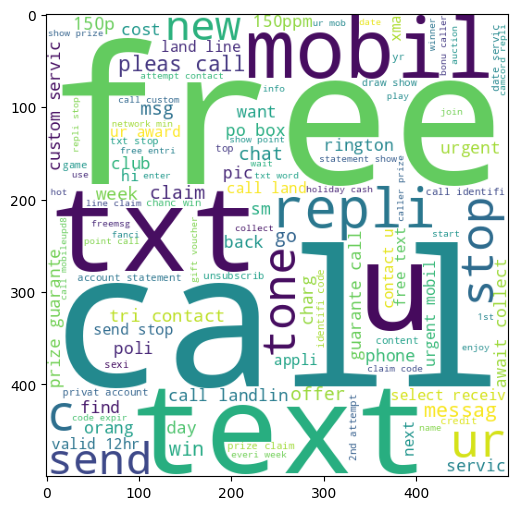

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

Now making WC for NOT SPAM

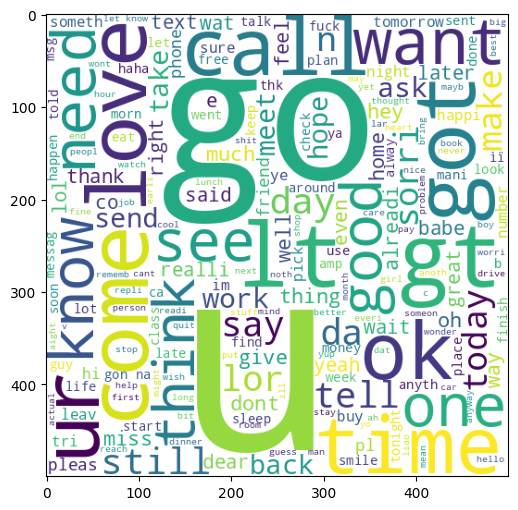

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

Ok now we can clearly see the main words in SPAM msgs but let's work on our main dataset and find all the words use in all the SPAM msgs

In [ ]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
# spam_corpus
len(spam_corpus)

9939

Some words are being repeated here so:

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


Going to do the same thing for NOT SPAM

In [ ]:
Not_spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        Not_spam_corpus.append(word)
# Not_spam_corpus
# len(Not_spam_corpus)
from collections import Counter
pd.DataFrame(Counter(Not_spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


# Now let's move towards the main thing **Model Building**
Now for machine learning Algorithm input needs to be a numeric value but here it's in words so we need to convert it into numeric digits
Now there are a few methods for this:


1.   Bag of words
2.   TF-IDF (Term Frequency-Inverse Document Frequency)
3.   word to vec



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

we have X as the features (words of our data)
Now Y will be our target

In [ ]:
y=df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

Now importing different Algorithms

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[791 105]
 [ 21 117]]
0.527027027027027


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[881  15]
 [ 13 125]]
0.8928571428571429


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("Precision",precision_score(y_test,y_pred3))

Accuracy 0.9700193423597679
[[893   3]
 [ 28 110]]
Precision 0.9734513274336283


**Now i will go with bernouli cuz both accuracy and precision are good with it**

precision_score(y_test, y_pred_nn)

In [ ]:
import pickle
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(cv, vectorizer_file)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(bnb, model_file)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
import pickle


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


with open('/content/vectorizer.pkl', 'rb') as vectorizer_file:
         cv = pickle.load(vectorizer_file)


with open('model.pkl', 'rb') as model_file:
         bnb = pickle.load(model_file)


user_input = input("Enter a message: ") if 'google.colab' in str(get_ipython()) else input()


if user_input:

    transformed_input = transform_text(user_input)


    input_vectorized = cv.transform([transformed_input]).toarray()


    prediction = bnb.predict(input_vectorized)


    if(prediction[0]==1):
      print("It's a SPAM msg")
    else:
      print("It's a SPAM msg")
else:
    print("Please enter a non-empty message.")


Enter a message: Congratulations! You've been selected for an exclusive offer. Act now to claim your prize and enjoy unbelievable discounts on a wide range of products. This is a limited-time opportunity, so don't miss out!
It's a SPAM msg
